# Creating Network Visualizations

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,2
...,...,...,...
82,Greece,Italy,3
83,Italy,Japan,6
84,Romania,Russia,6
85,India,Lebanon,2


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Graph Visualization - Networkx

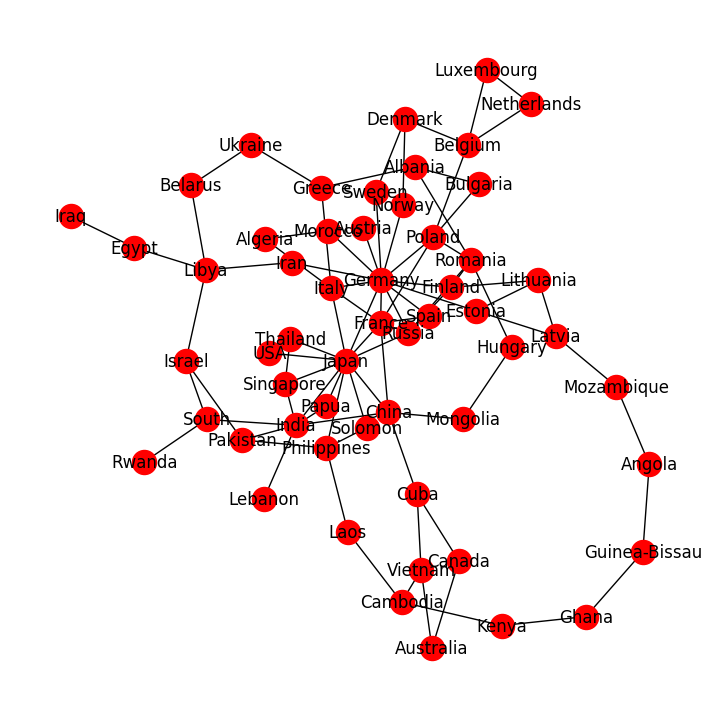

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_20th_century.png')

## Graph visualization - Pyvis

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Community detection - Leiden algorithm

In [9]:
!pip3 install cdlib
!pip install leidenalg
!pip install igraph

  Using cached leidenalg-0.10.2-cp38-abi3-macosx_10_9_x86_64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-macosx_10_9_x86_64.whl (1.7 MB)


In [10]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [11]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [12]:
new_com = coms.to_node_community_map()

In [13]:
new_com

defaultdict(list,
            {'Japan': [0],
             'China': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Solomon': [0],
             'Philippines': [0],
             'India': [0],
             'USA': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South': [0],
             'Papua': [0],
             'Rwanda': [0],
             'Lebanon': [0],
             'France': [1],
             'Germany': [1],
             'Italy': [1],
             'Austria': [1],
             'Spain': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Morocco': [1],
             'Algeria': [1],
             'Russia': [2],
             'Poland': [2],
             'Finland': [2],
             'Albania': [2],
             'Romania': [2],
             'Bulgaria': [2],
             'Hungary': [2],
             'Mongolia': [2],
             'Laos': [3],
             'Cambodia': [3],
             

In [14]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [15]:
dict_com

{'Japan': 0,
 'China': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Solomon': 0,
 'Philippines': 0,
 'India': 0,
 'USA': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South': 0,
 'Papua': 0,
 'Rwanda': 0,
 'Lebanon': 0,
 'France': 1,
 'Germany': 1,
 'Italy': 1,
 'Austria': 1,
 'Spain': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Russia': 2,
 'Poland': 2,
 'Finland': 2,
 'Albania': 2,
 'Romania': 2,
 'Bulgaria': 2,
 'Hungary': 2,
 'Mongolia': 2,
 'Laos': 3,
 'Cambodia': 3,
 'Kenya': 3,
 'Cuba': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Greece': 4,
 'Ukraine': 4,
 'Belarus': 4,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Ghana': 5,
 'Guinea-Bissau': 5,
 'Angola': 5,
 'Mozambique': 5,
 'Belgium': 6,
 'Netherlands': 6,
 'Luxembourg': 6}

In [30]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="1200px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### I am hardly an authority on history, but to my knowledge this graphic makes sense in the context of the key events of the 20th century. (Of course, due to previously-addressed difficulties along the way of my learning journey, the UK is omitted, and the USA is largely under represented here.) As mentioned in a previous task, the Soviet Union is omitted due to the updated country list used in the analysis. Otherwise, it's plain to see that Germany and Japan played the largest roles in the events of the 20th century. Considering Germany's role in both WWI and WWII, and Japan's in WWII, this makes sense. France, Italy, and Poland had fairly large roles in the world wars, and are in close proximity to Germany on the map. So it is not surprising that these countries show heavy interaction with Germany. I would have expected China to show up with a larger role, although it is the country with the highest interaction with major-player, Japan. Most of the communites in the graphic reflect geographic positioning on the map.

## (Most of) The most influential countries in the 20th century

In [17]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.12727272727272726,
 'Russia': 0.09090909090909091,
 'Germany': 0.23636363636363636,
 'Italy': 0.09090909090909091,
 'Austria': 0.01818181818181818,
 'Spain': 0.03636363636363636,
 'Poland': 0.09090909090909091,
 'Estonia': 0.05454545454545454,
 'Latvia': 0.05454545454545454,
 'Lithuania': 0.05454545454545454,
 'Finland': 0.07272727272727272,
 'Belgium': 0.07272727272727272,
 'Netherlands': 0.03636363636363636,
 'Luxembourg': 0.03636363636363636,
 'Denmark': 0.05454545454545454,
 'Norway': 0.03636363636363636,
 'Sweden': 0.03636363636363636,
 'Albania': 0.05454545454545454,
 'Greece': 0.05454545454545454,
 'Ukraine': 0.03636363636363636,
 'Belarus': 0.03636363636363636,
 'Libya': 0.07272727272727272,
 'Egypt': 0.03636363636363636,
 'Iraq': 0.01818181818181818,
 'Japan': 0.21818181818181817,
 'Morocco': 0.03636363636363636,
 'Algeria': 0.03636363636363636,
 'China': 0.09090909090909091,
 'Thailand': 0.03636363636363636,
 'Singapore': 0.05454545454545454,
 'Solomon': 0.036363

In [18]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [19]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

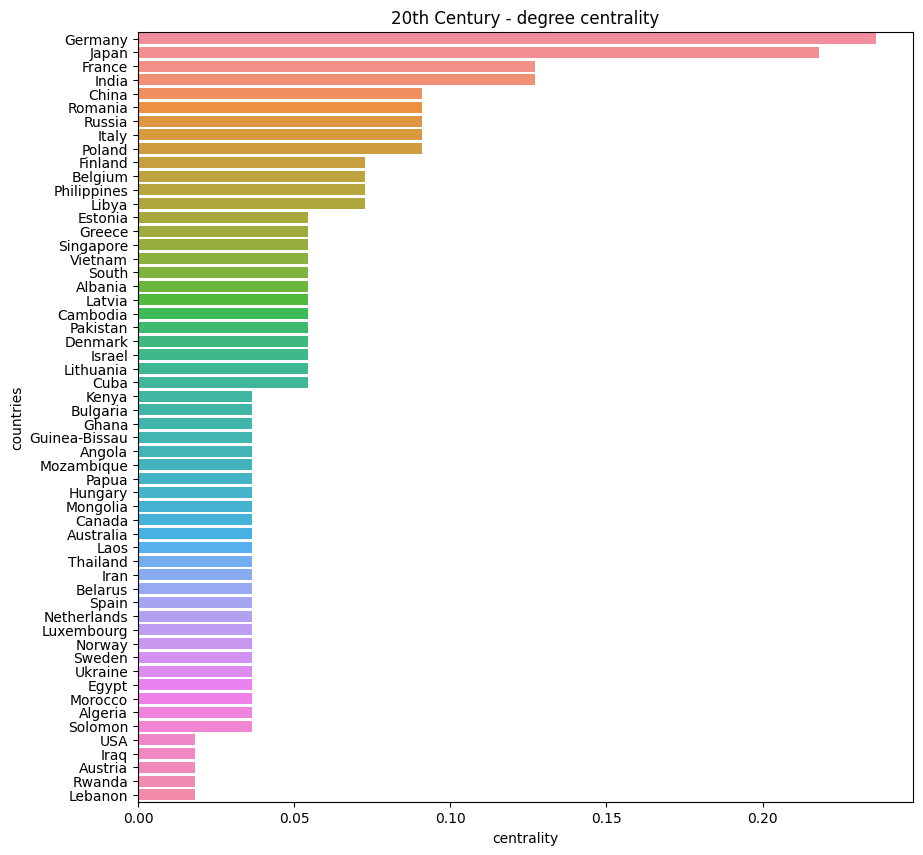

In [22]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

#### The top few countries here seem to make sense. It is surprising to me how high on the list Romania registers. Again, it would be interesting to see how this list would change with proper representation of the USSR, UK, and USA in the data.

In [23]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [24]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

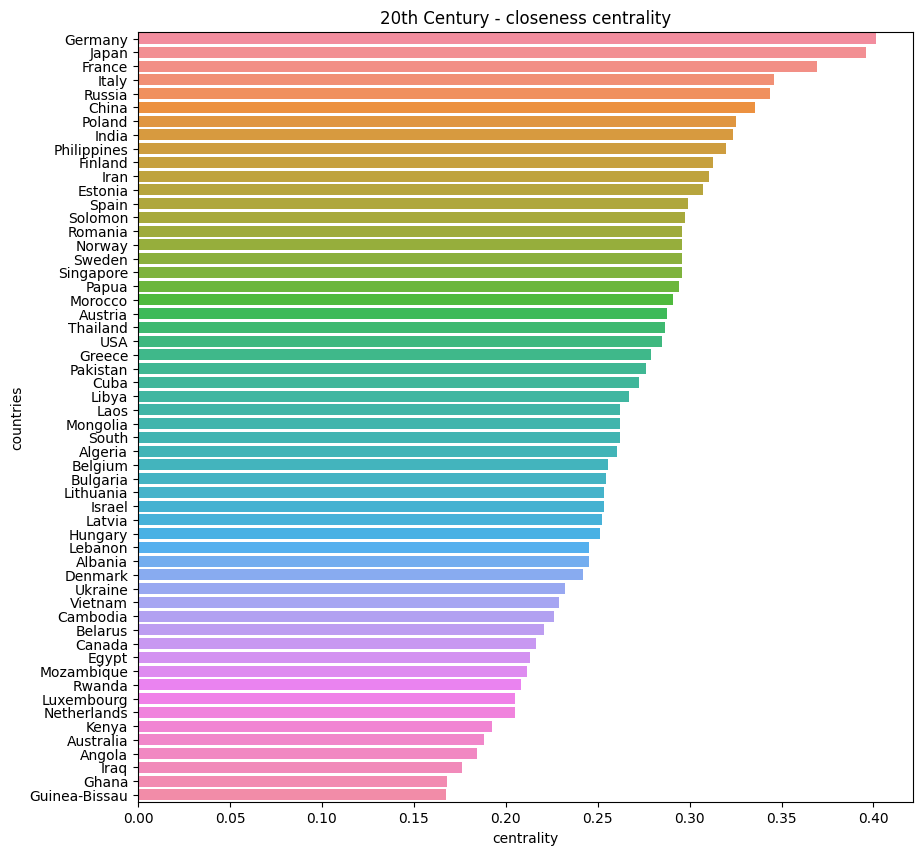

In [25]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

#### It's interesting how this graph changes compared to degree centrality. Notably, just to name a few Solomon, Estonia, USA, Norway, and Sweden, jump up the list quite a bit.

In [26]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [27]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

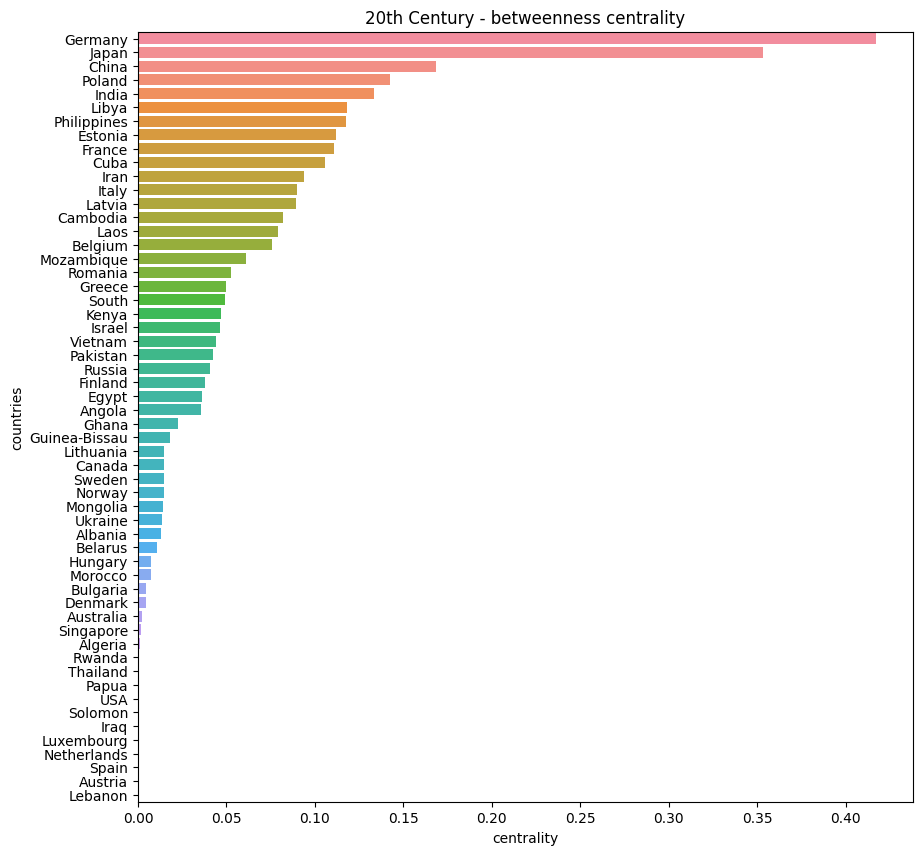

In [28]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

#### The top few countries make sense here. This list surprises me with how much influence Libya, Philippines, and Estonia show. 

In [29]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')